In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn import cross_validation as cv
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/evan/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 外部验证

In [2]:
data_evaluation =pd.read_excel('data_GRNN.xlsx',index_col='Date')[-12:]

In [3]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_GRNN'] = abs(data_evaluation['NN']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_GRNN'] 

data_evaluation['error_ARIMA'] = data_evaluation['forecast']-data_evaluation['Incidence_rate']
data_evaluation['error_GRNN'] = data_evaluation['NN']-data_evaluation['Incidence_rate']

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['GRNN_per'] = (data_evaluation['Dist_GRNN']/data_evaluation['Incidence_rate'])*100

np.mean(data_evaluation['ARIMA_per'])
np.mean(data_evaluation['GRNN_per'])

6.067337347442734

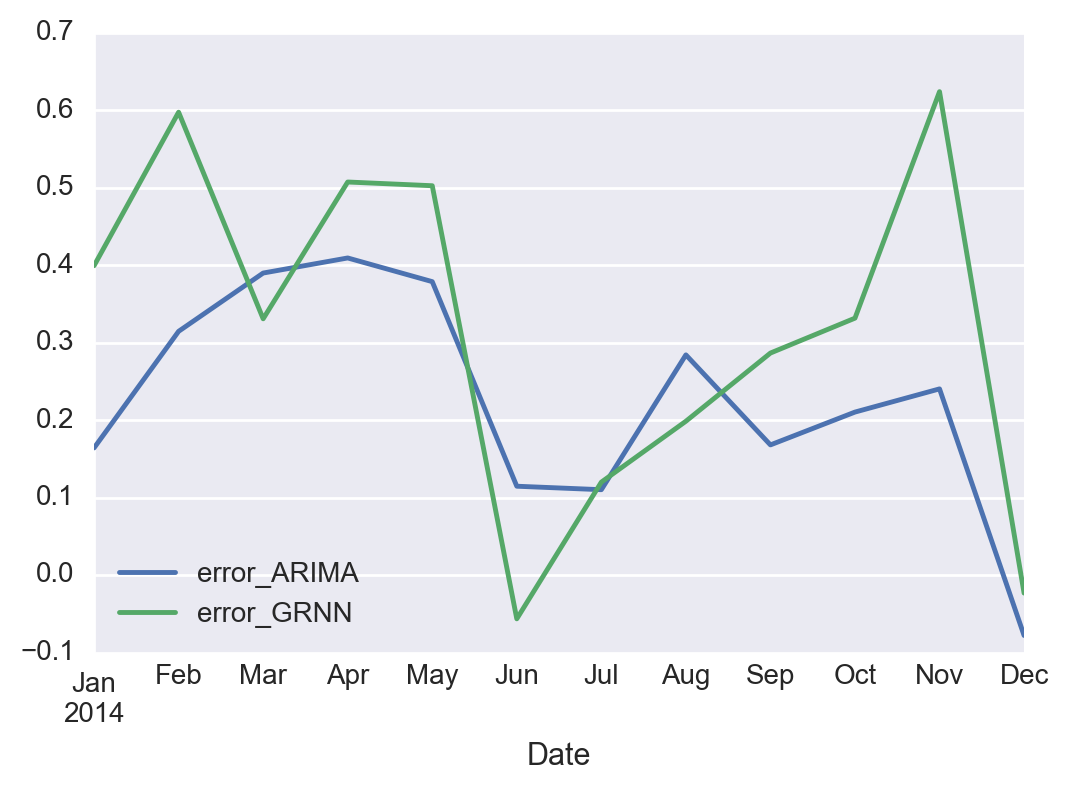

In [4]:
data_evaluation[['error_ARIMA','error_GRNN']].plot()

In [5]:
sum(data_evaluation['Dist_ARIMA'])

2.8626964737437941

In [6]:
sum(data_evaluation['Dist_GRNN'])

3.9775162728866569

In [7]:
sum(data_evaluation['Better']>0)

4

In [8]:
sum(data_evaluation['Better'])

-1.1148197991428628

In [9]:
np.mean(data_evaluation['Better'])/data_evaluation['Incidence_rate'].mean()*100

-1.6986744561180354

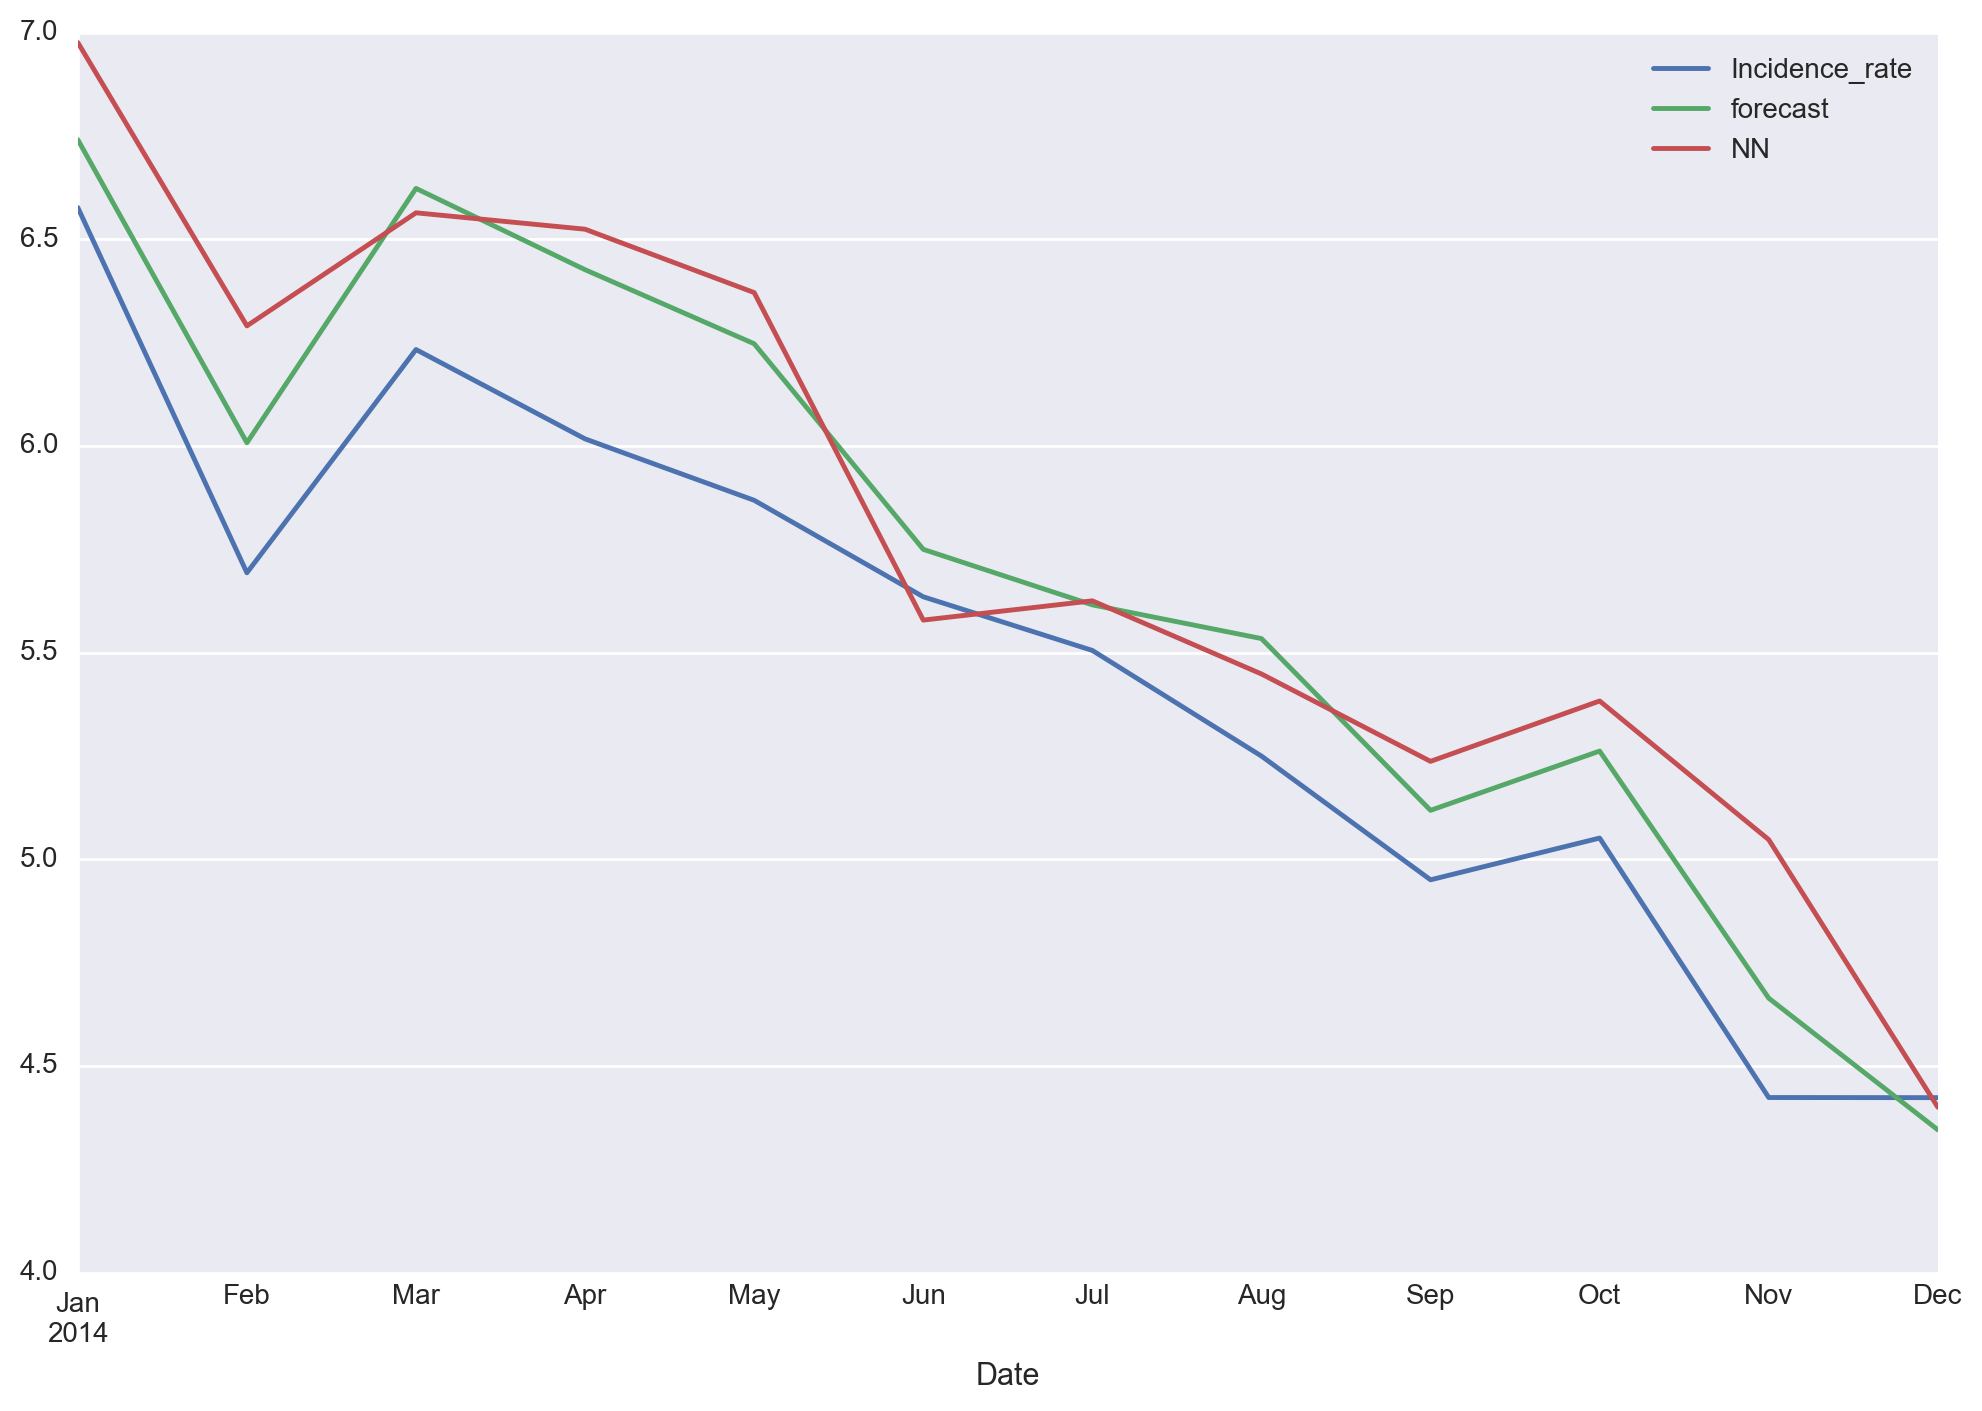

In [10]:
data_evaluation[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 内部验证

In [11]:
data_intro =pd.read_excel('data_GRNN.xlsx',index_col='Date')[:-12]

In [12]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_GRNN'] = abs(data_intro['NN']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_GRNN'] 

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['GRNN_per'] = (data_intro['Dist_GRNN']/data_intro['Incidence_rate'])*100

In [13]:
np.mean(data_intro['Dist_ARIMA'])

0.36309655094463666

In [14]:
np.mean(data_intro['Dist_GRNN'])

0.22681456924651774

In [15]:
np.mean(data_intro['Better']>0)

0.65420560747663548

In [16]:
sum(data_intro['Better'])

14.582172041698726

In [17]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

2.038703636438626

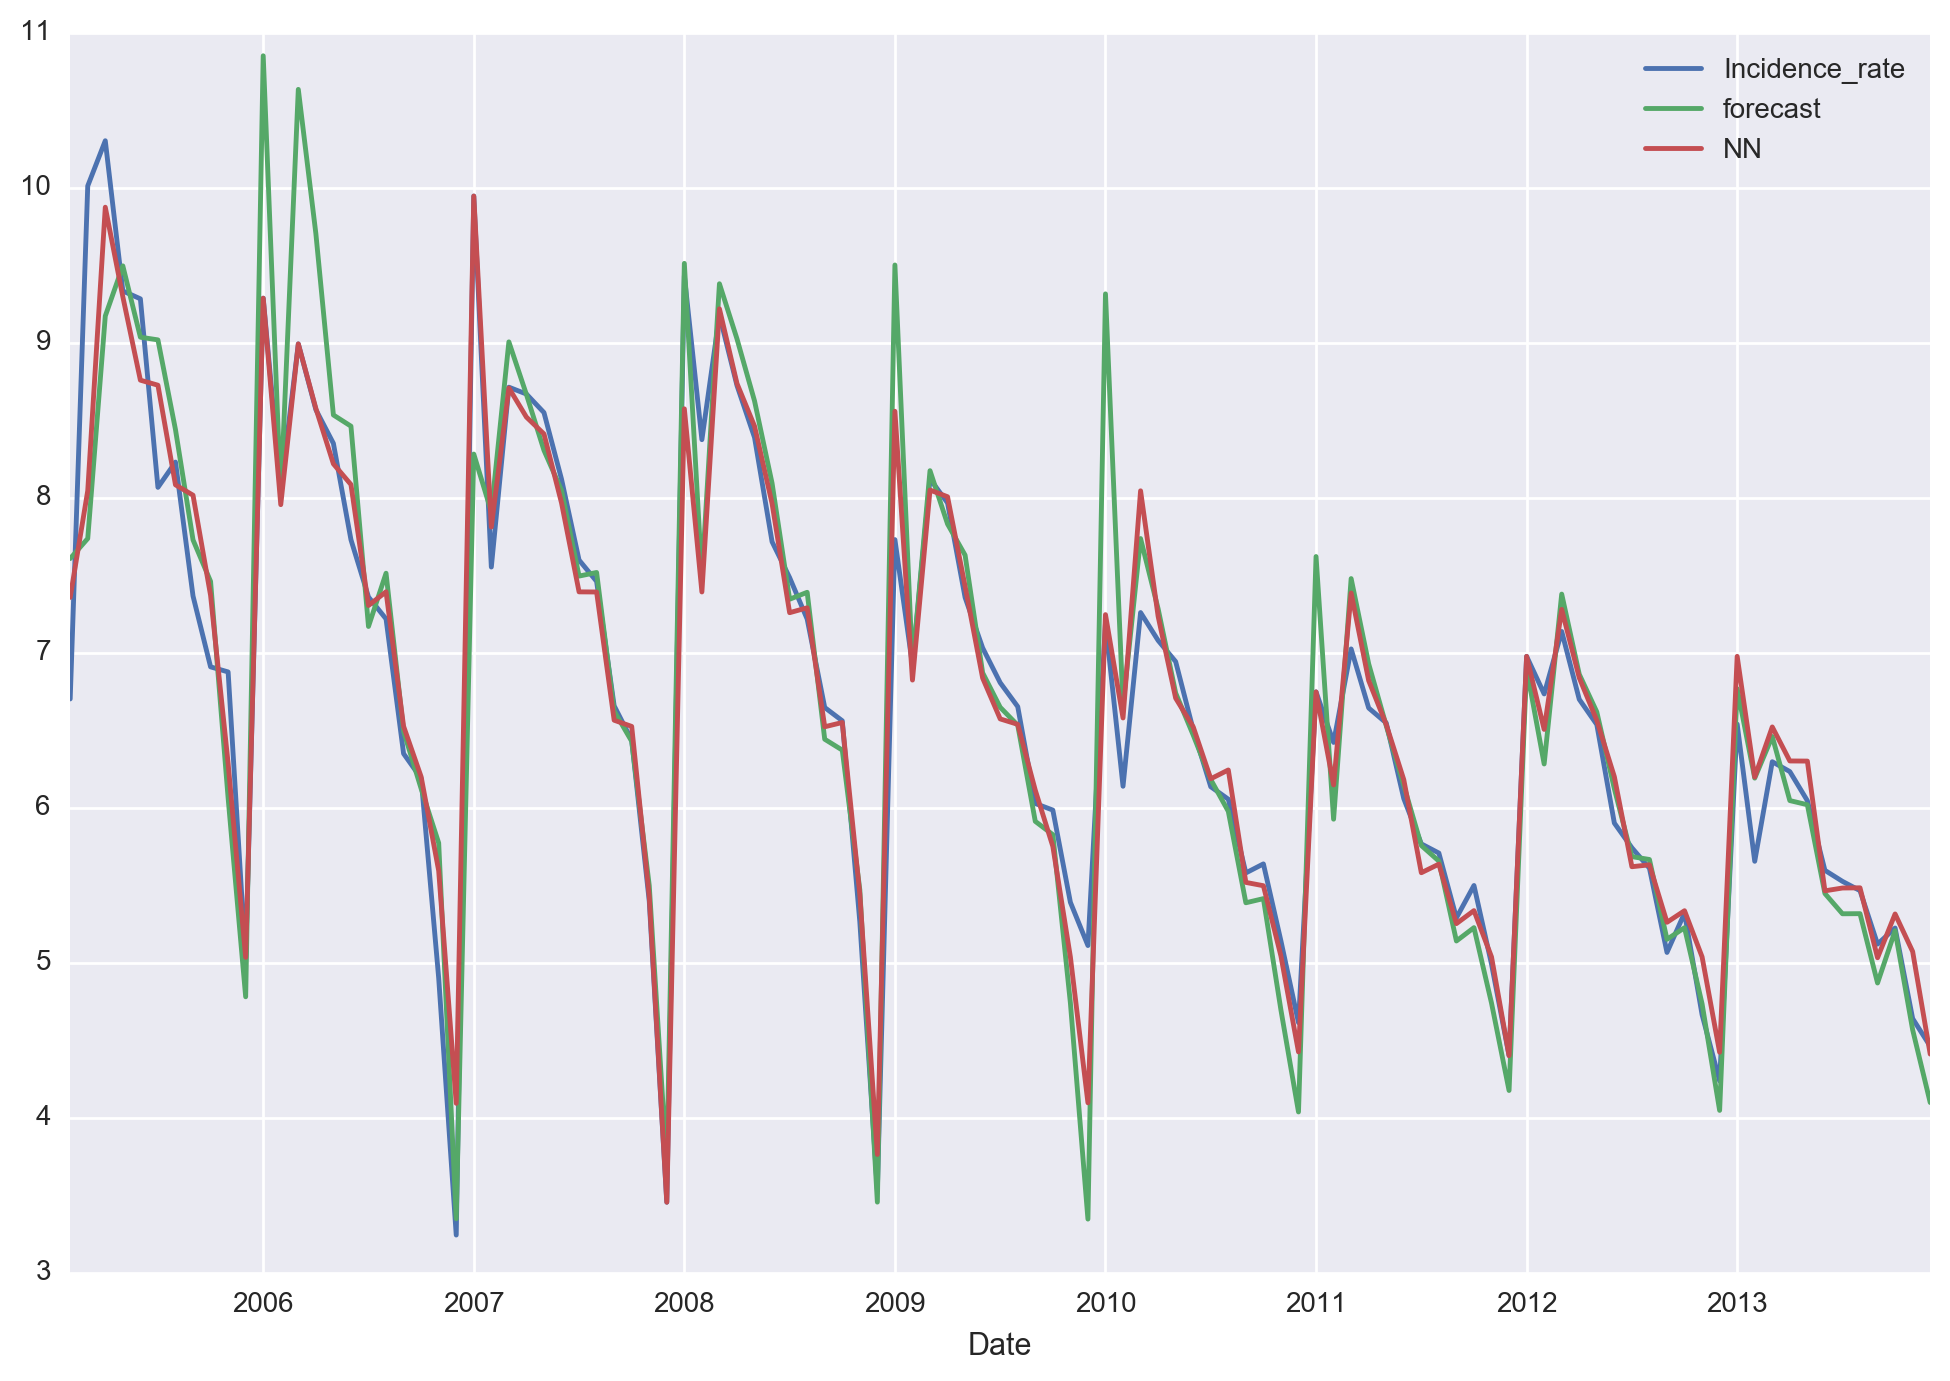

In [18]:
data_intro[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 数据集验证

In [19]:
data_total =pd.read_excel('data_GRNN.xlsx',index_col='Date')

In [20]:
## 绝对误差
data_total['Dist_ARIMA'] = abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_GRNN'] = abs(data_total['NN']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_GRNN'] 
data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_GRNN'] = data_total['NN']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['GRNN_per'] = (data_total['Dist_GRNN']/data_total['Incidence_rate'])*100

In [21]:
np.mean(data_total['Dist_ARIMA'])

0.350538045586722

In [22]:
np.mean(data_total['Dist_GRNN'])

0.2373670183383534

In [23]:
np.mean(data_total['Better']>0)

0.62184873949579833

In [24]:
sum(data_total['Better'])

13.467352242555865

In [25]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

1.7246032116365373

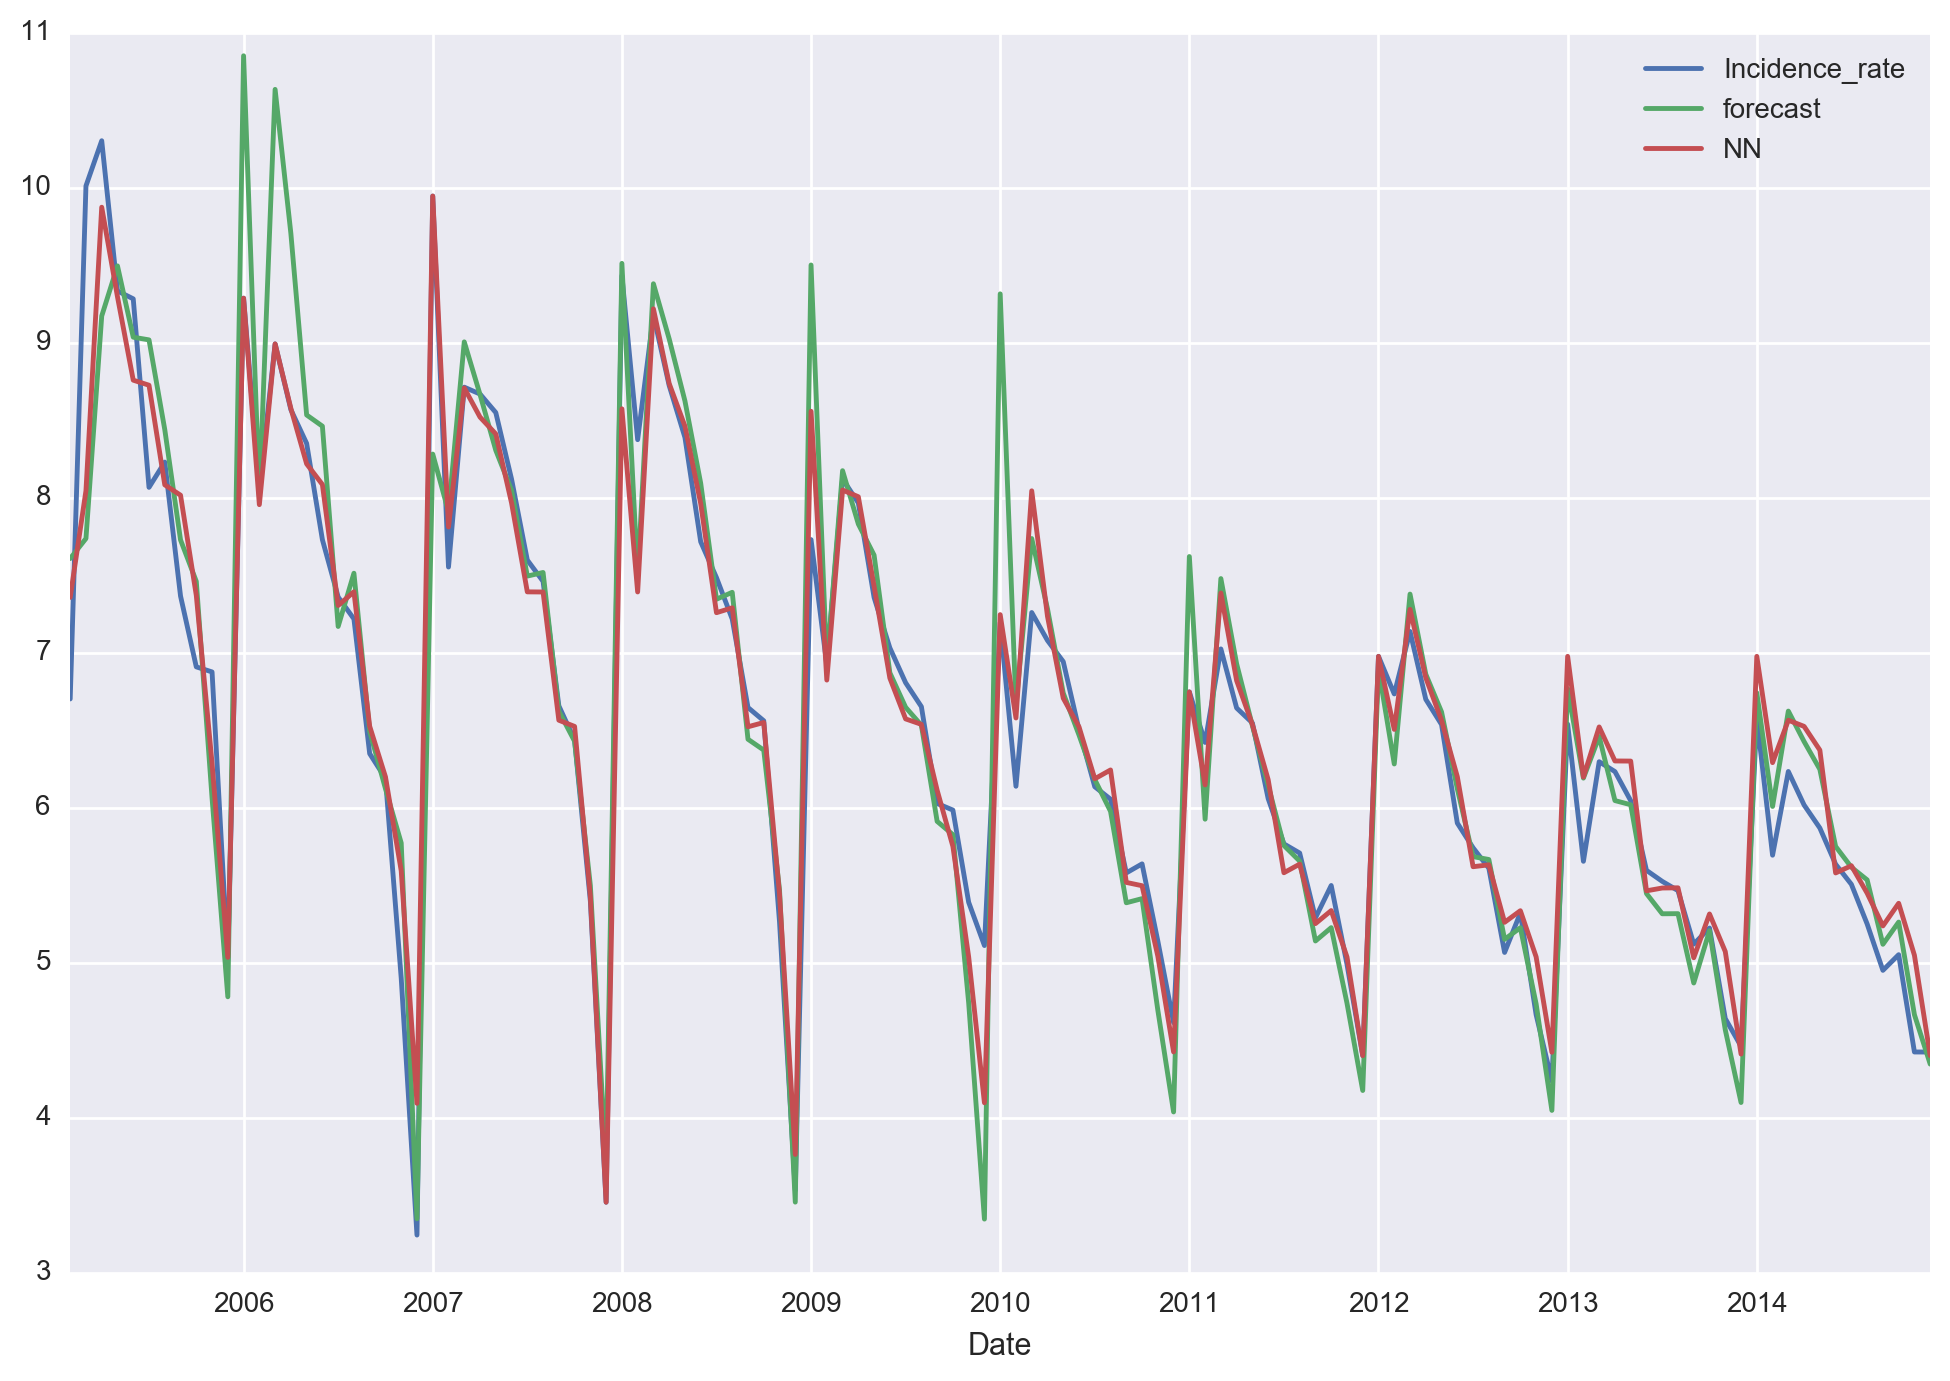

In [26]:
data_total[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 残差检验

In [27]:
data_total[['Dist_ARIMA','Dist_GRNN']]

,Dist_ARIMA,Dist_GRNN
Date,,
2005-02-01,0.905622,0.654962
2005-03-01,2.274768,1.966441
2005-04-01,1.130813,0.428877
2005-05-01,0.161727,0.037461
2005-06-01,0.247460,0.524755
2005-07-01,0.951656,0.659180
2005-08-01,0.209665,0.146840
2005-09-01,0.362162,0.650517
2005-10-01,0.551448,0.461314


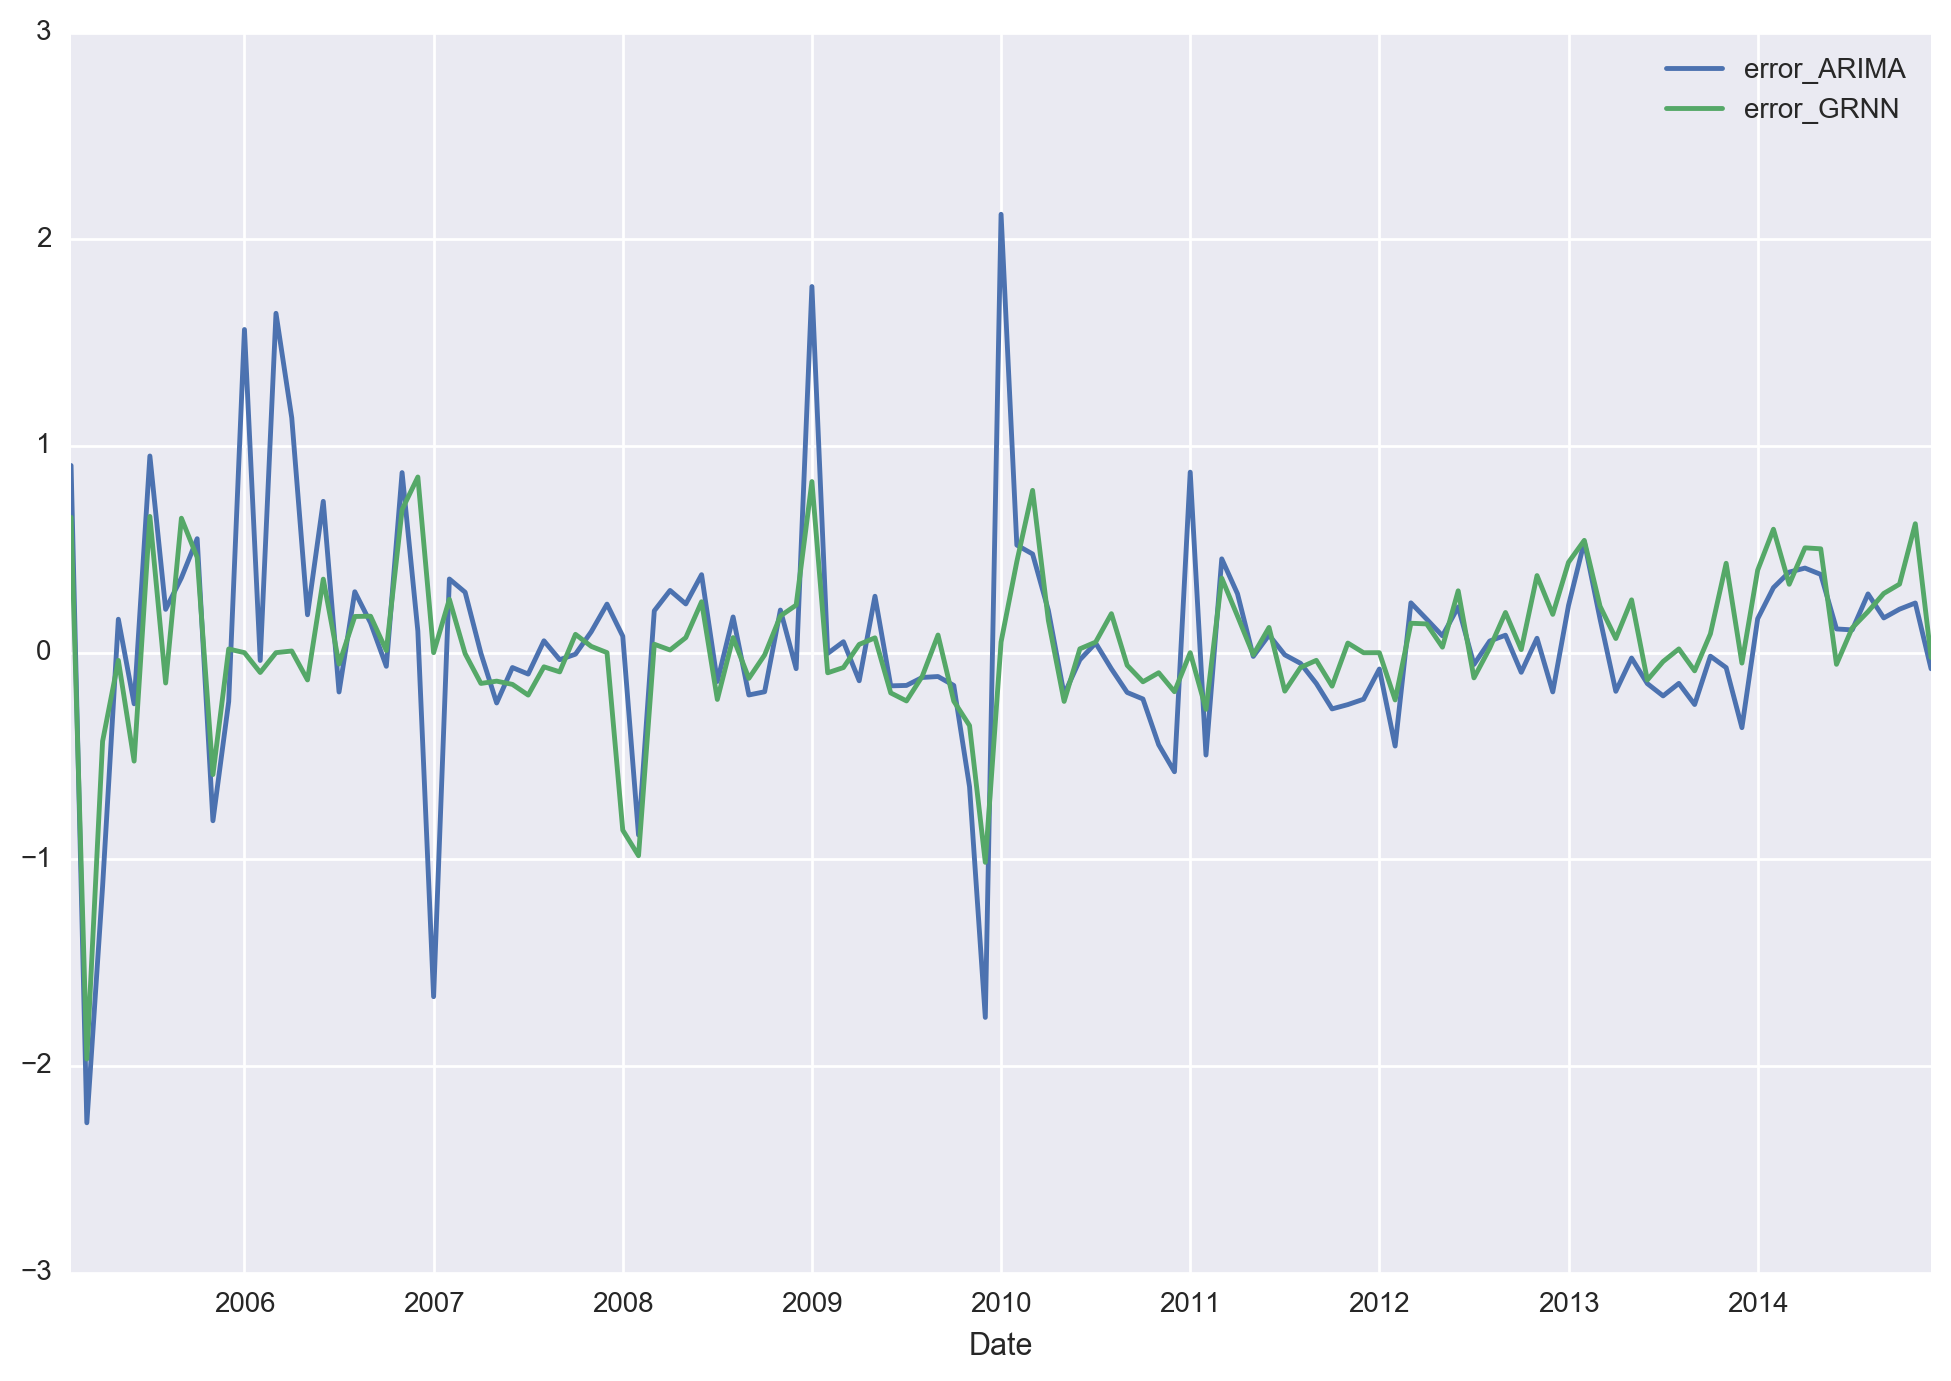

In [28]:
data_total[['error_ARIMA','error_GRNN']].plot(figsize=(12, 8)) 